In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Exploratory Data Analysis

In this section, we will be exploring 3 predictor variables `gender`, `age` and `traffic` that are related to the 2 response variables `claims` and `cost` to find patterns or underlying relationships between the predictor and response variables. This is going to help us answer the initial question we posed in the subsequent sections. 
<br/> 
<br/>
Lastly, we will also be taking a look at the relationship between `numclaims` and `cost`.

<br/>

## Table of Contents 
>1. Classifying dataset into numerical and categorical <br>
>2. Exploring Predictor Variables <br>
>>2.1 `gender` (gender of individual) <br>
>>2.2 `age` (age category of individual) <br>
>>2.3 `traffic` (traffic index) <br>
>3. Exploring the Response Variables
>>3.1 `claims` (boolean variable indicating presence of an insurance claim) <br>
>>3.2 `cost` (cost of insurance claim when `claims` is present) <br>
>4. Exploring Relationship between predictor variables and `claims`
>>4.1 `gender` against `claims` <br>
>>4.2 `age` against `claims` <br>
>>4.3 `traffic` against `claims` <br>
>5. Exploring Relationship between predictor variables and `cost`
>>5.1 `gender` against `cost` <br>
>>5.2 `age` against `cost` <br>
>>5.3 `traffic` against `cost` <br>
>6. Exploring Relationship between `numclaims` and `cost`

<br/>

## 1. First, let us classify our predictor and response variables as numerical or categorical.

Numerical:

1. `age` (Predictor) <br>
2. `traffic`(Predictor) <br>
3. `cost` (Response)` <br>


Categorical:

1. `gender` (Predictor) <br>
2. `claims` (Response) <br>


We will be renaming some of the column names in the dataset to their respective variable names above in order to visually simplify our plots later on.

In [2]:
# Import csv file as DF
data = pd.read_csv("Prepped.csv")


# Rename some of the variables' column names for simplicity 
data = data.rename(columns={'agecat':'age', 'traffic_index':'traffic','claimcst0':'cost'})


# Extract the predictor variables into a DF
gender = pd.DataFrame(data["gender"]) 
age = pd.DataFrame(data["age"])  
traffic = pd.DataFrame(data["traffic"])


# Extract response variable 'claims' into a DF
claims = pd.DataFrame(data["claims"])  


# In order to extract the dataframe 'cost', we will need to extract the rows with a positive occurence of a claim 
# from the orginal dataset 'data' into a new dataframe 'data_with_claims', 
# and subsequently extract the relevant column from 'data_with_claims' as the 'cost' dataframe
data_with_claims = data[data['numclaims']>0]
cost = pd.DataFrame(data_with_claims["cost"])


# Display data
print("Data dimensions: ", data.shape)
print("Data types:")
print(data.dtypes)
data.head()



Data dimensions:  (54135, 15)
Data types:
pol_eff_dt       object
gender           object
age             float64
credit_score    float64
area             object
traffic         float64
veh_age         float64
veh_body         object
veh_value       float64
numclaims         int64
cost            float64
month           float64
year            float64
monthDiff       float64
claims           object
dtype: object


,pol_eff_dt,gender,age,credit_score,area,traffic,veh_age,veh_body,veh_value,numclaims,cost,month,year,monthDiff,claims
0,12/30/2020,F,4.0,4.265979,D,65.811441,34.0,HBACK,1.331,0,0.0,12.0,2020.0,40.0,No
1,12/30/2020,F,2.0,38.558763,D,81.542373,1.0,UTE,3.740,0,0.0,12.0,2020.0,40.0,No
2,12/30/2020,M,2.0,58.971134,B,57.369174,100.0,COUPE,0.880,0,0.0,12.0,2020.0,40.0,No
3,12/30/2020,M,4.0,78.158763,B,48.559852,67.0,SEDAN,1.045,0,0.0,12.0,2020.0,40.0,No
4,12/30/2020,F,4.0,93.263918,C,56.320445,100.0,HBACK,0.473,0,0.0,12.0,2020.0,40.0,No


# 2. Exploring Predictor Variables

In [3]:
def plot(var):
    f, axes = plt.subplots(1, 3, figsize=(18, 9))
    sb.boxplot(data = var, orient = "h", ax = axes[0])
    sb.histplot(data = var, ax = axes[1])
    sb.violinplot(data = var, orient = "h", ax = axes[2])

## 2.1 Exploring predictor variable `gender`
`gender` is a categorical variable with 2 values: `Male` and `Female`

gender
F         31215
M         22920
dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

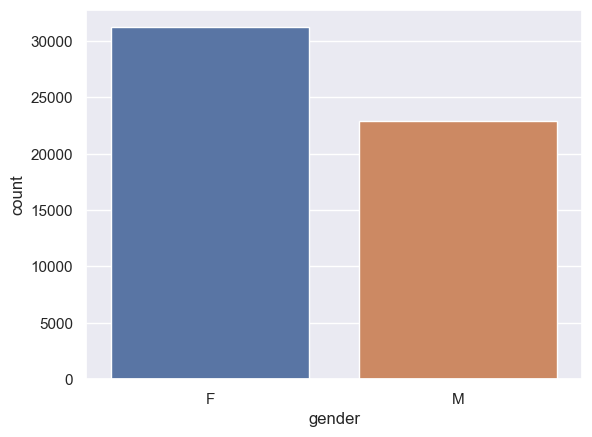

In [16]:
print(gender.value_counts())
sb.countplot(x='gender', data=data)


## 2.1 Exploring predictor variable `age`
`age` is a categorical variable with 6 different age categories


                age
count  54135.000000
mean       3.476512
std        1.366029
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        6.000000


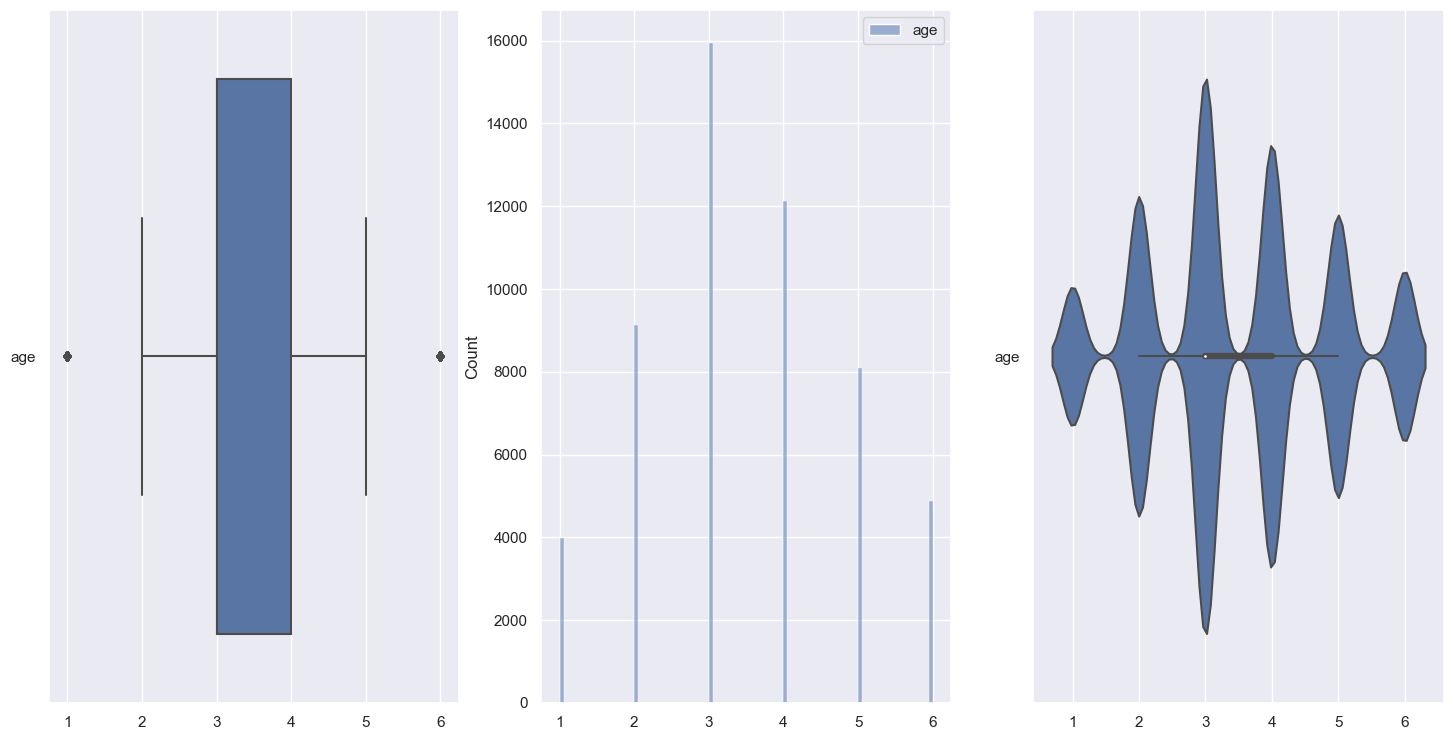

In [5]:
print(age.describe())
plot(age)

## 2.3 Exploring `traffic`
`traffic` is a numerical variable that represents the traffic index

            traffic
count  54135.000000
mean      50.582814
std       17.001347
min        1.000000
25%       39.016419
50%       52.545021
75%       64.185911
max      100.000000


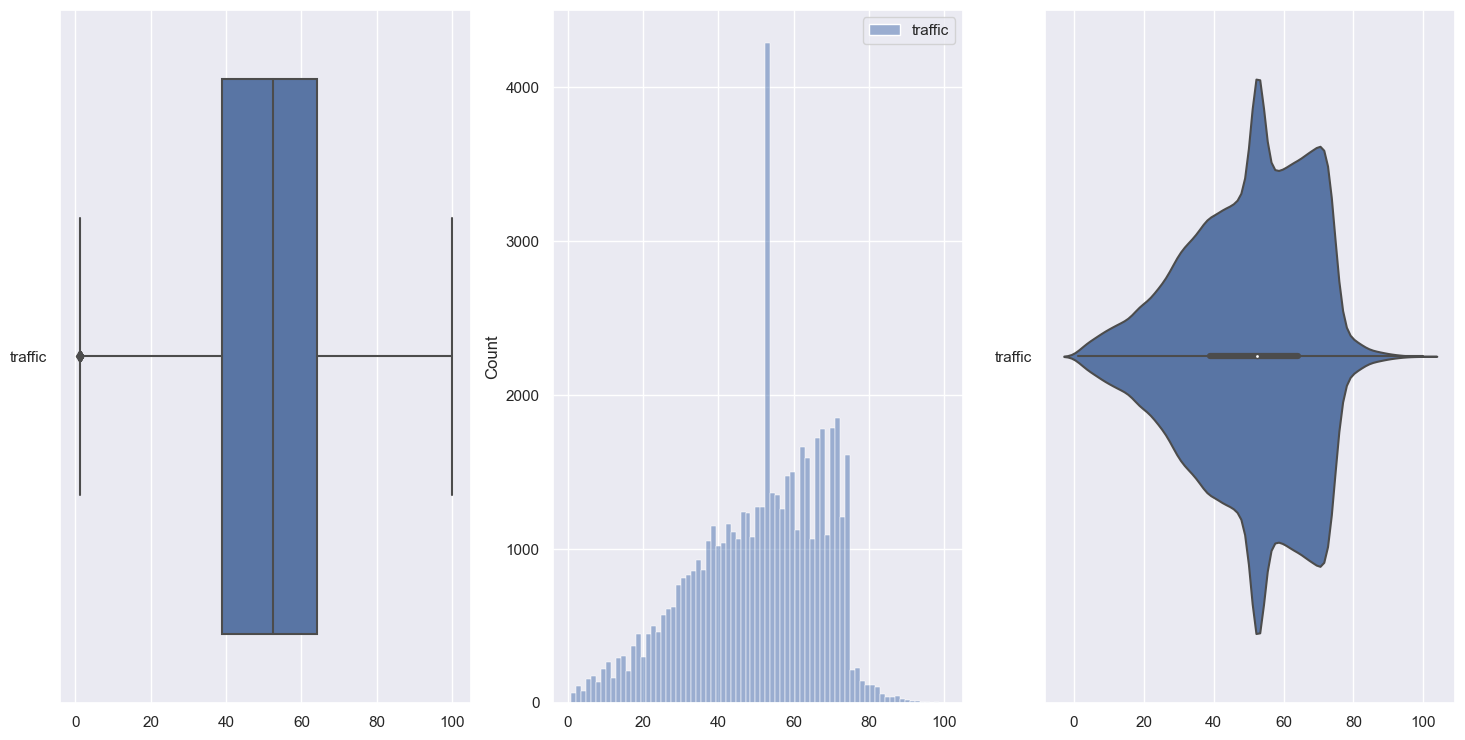

In [6]:
print(traffic.describe())
plot(traffic)

# 3. Exploring Response Variables

## 3.1 `claims` 
This represents the presence or lack thereof of an insurance claim in the dataset

claims
No        45963
Yes        8172
dtype: int64


<AxesSubplot:xlabel='claims', ylabel='count'>

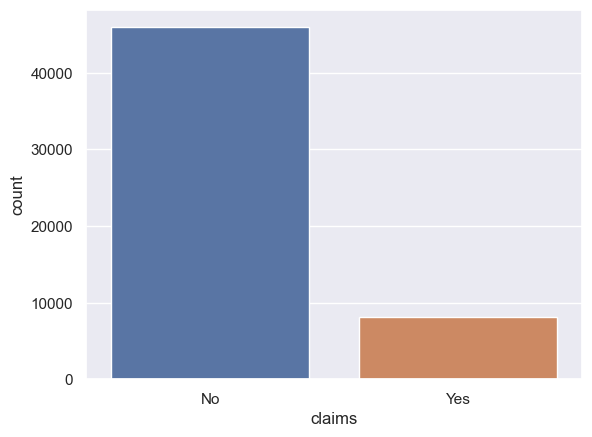

In [7]:
print(claims.value_counts())
sb.countplot(x='claims', data=claims)

## 3.2 `cost`
This represents the cost of each insurance claim when present

               cost
count   8172.000000
mean    2865.598261
std     5651.187984
min       80.363865
25%      400.538148
50%     1036.258416
75%     2829.795923
max    69478.897830


<AxesSubplot:>

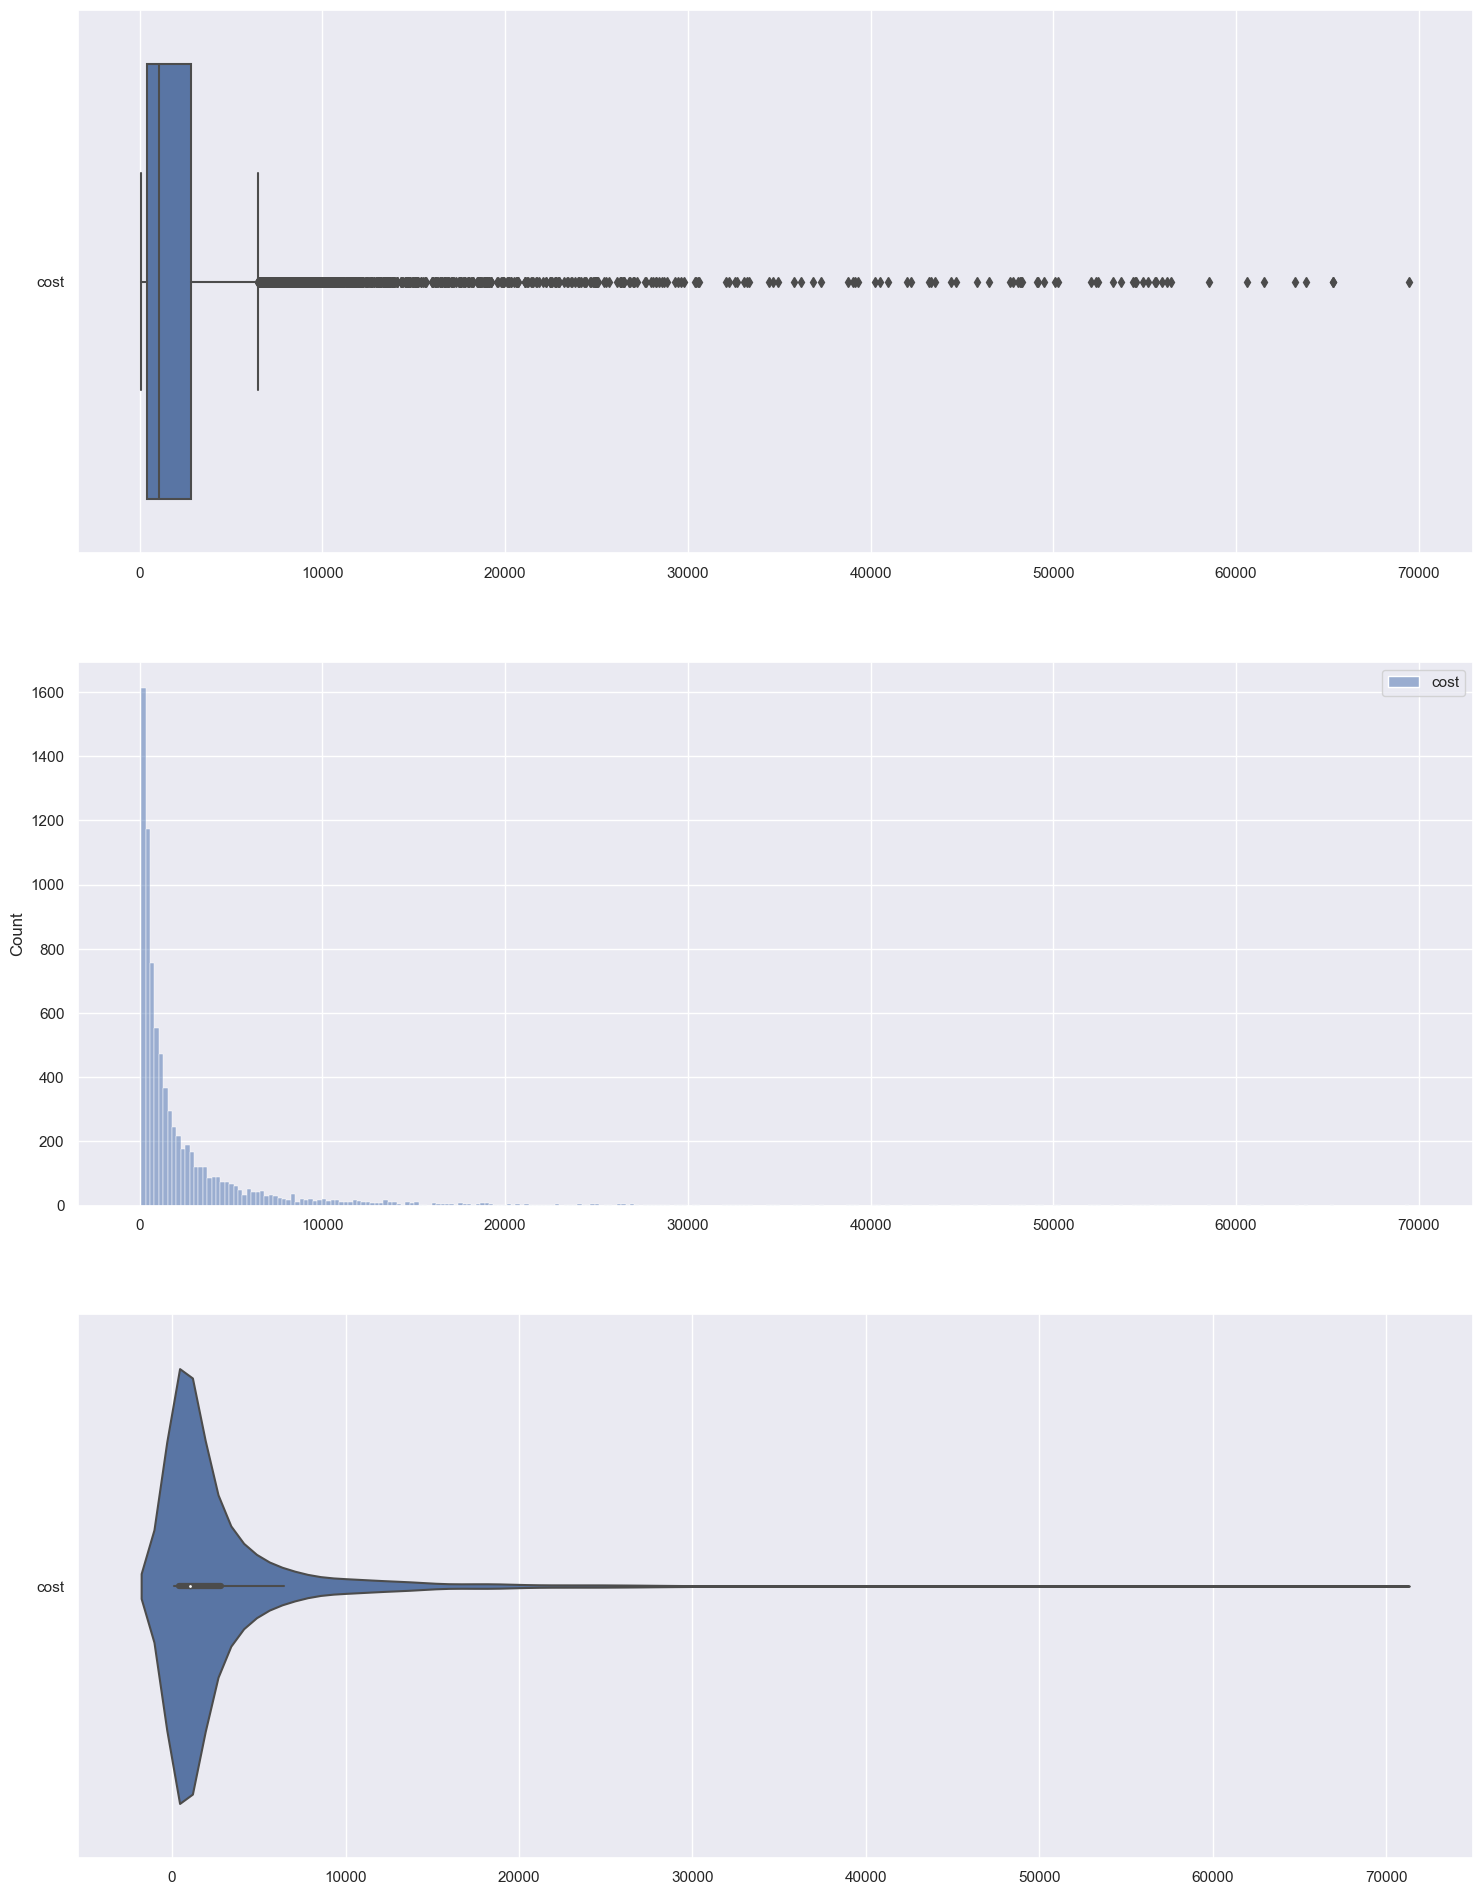

In [8]:
print(cost.describe())

f, axes = plt.subplots(3, 1, figsize=(18, 24))
sb.boxplot(data = cost, orient = "h", ax = axes[0])
sb.histplot(data = cost, ax = axes[1])
sb.violinplot(data = cost, orient = "h", ax = axes[2])


# 4. Explore the relationship between `predictor variables` and `response variables`

## 4.1 Explore the relationship between `gender` and `claims` 

Plot `gender` against `claims` to visualize their mutual relationship.

gender  claims
F       No        28583
        Yes        2632
M       No        17380
        Yes        5540
Name: claims, dtype: int64


<AxesSubplot:xlabel='claims', ylabel='count'>

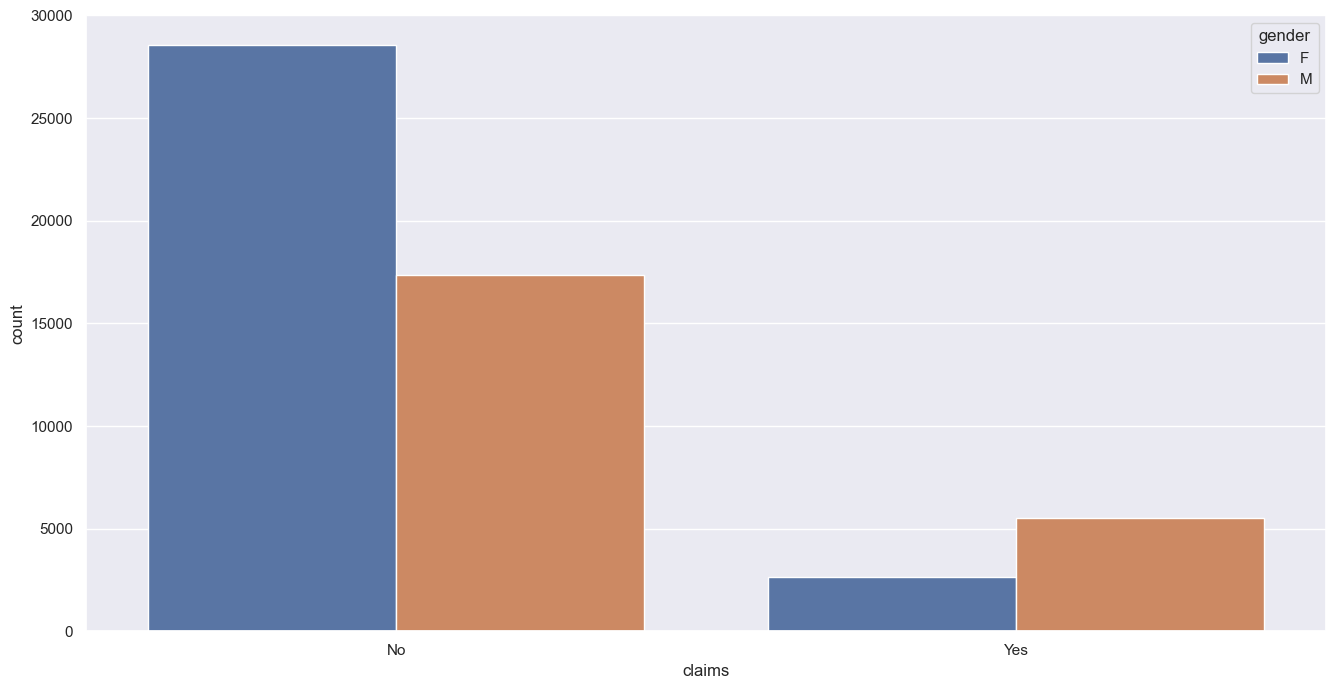

In [9]:
print(data.groupby('gender')['claims'].value_counts())

f = plt.figure(figsize=(16, 8))
sb.countplot(hue = 'gender', x = 'claims', data = data)


## 4.2 Explore the relationship between `age` and `claims`
Plot `age` against `claims` to visualize their mutual relationship.

age  claims
1.0  No         2543
     Yes        1434
2.0  No         7385
     Yes        1753
3.0  No        13883
     Yes        2067
4.0  No        10788
     Yes        1333
5.0  No         7299
     Yes         781
6.0  No         4065
     Yes         804
Name: claims, dtype: int64


<AxesSubplot:xlabel='claims', ylabel='count'>

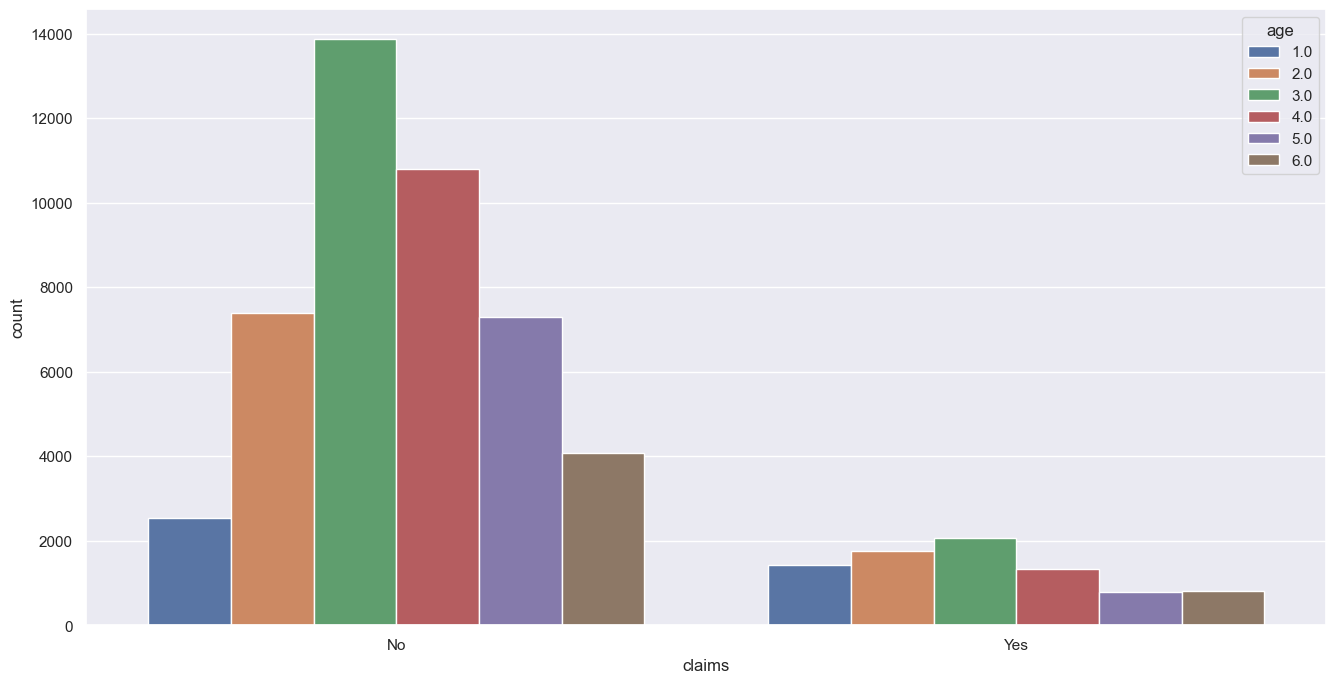

In [10]:
print(data.groupby('age')['claims'].value_counts())

f = plt.figure(figsize = (16,8))
sb.countplot(x = 'claims', hue = 'age', data=data)

## 4.3 Explore the relationship between `traffic` and `claims` 
Plot `claims` against `traffic` to visualize their mutual relationship.


          count       mean        std       min        25%        50%  \
claims                                                                  
No      45963.0  49.923415  17.149020  1.000000  38.229873  52.545021   
Yes      8172.0  54.291574  15.636858  2.048729  44.561573  55.533898   

              75%         max  
claims                         
No      63.504237   98.584216  
Yes     66.650424  100.000000  


<AxesSubplot:xlabel='traffic', ylabel='claims'>

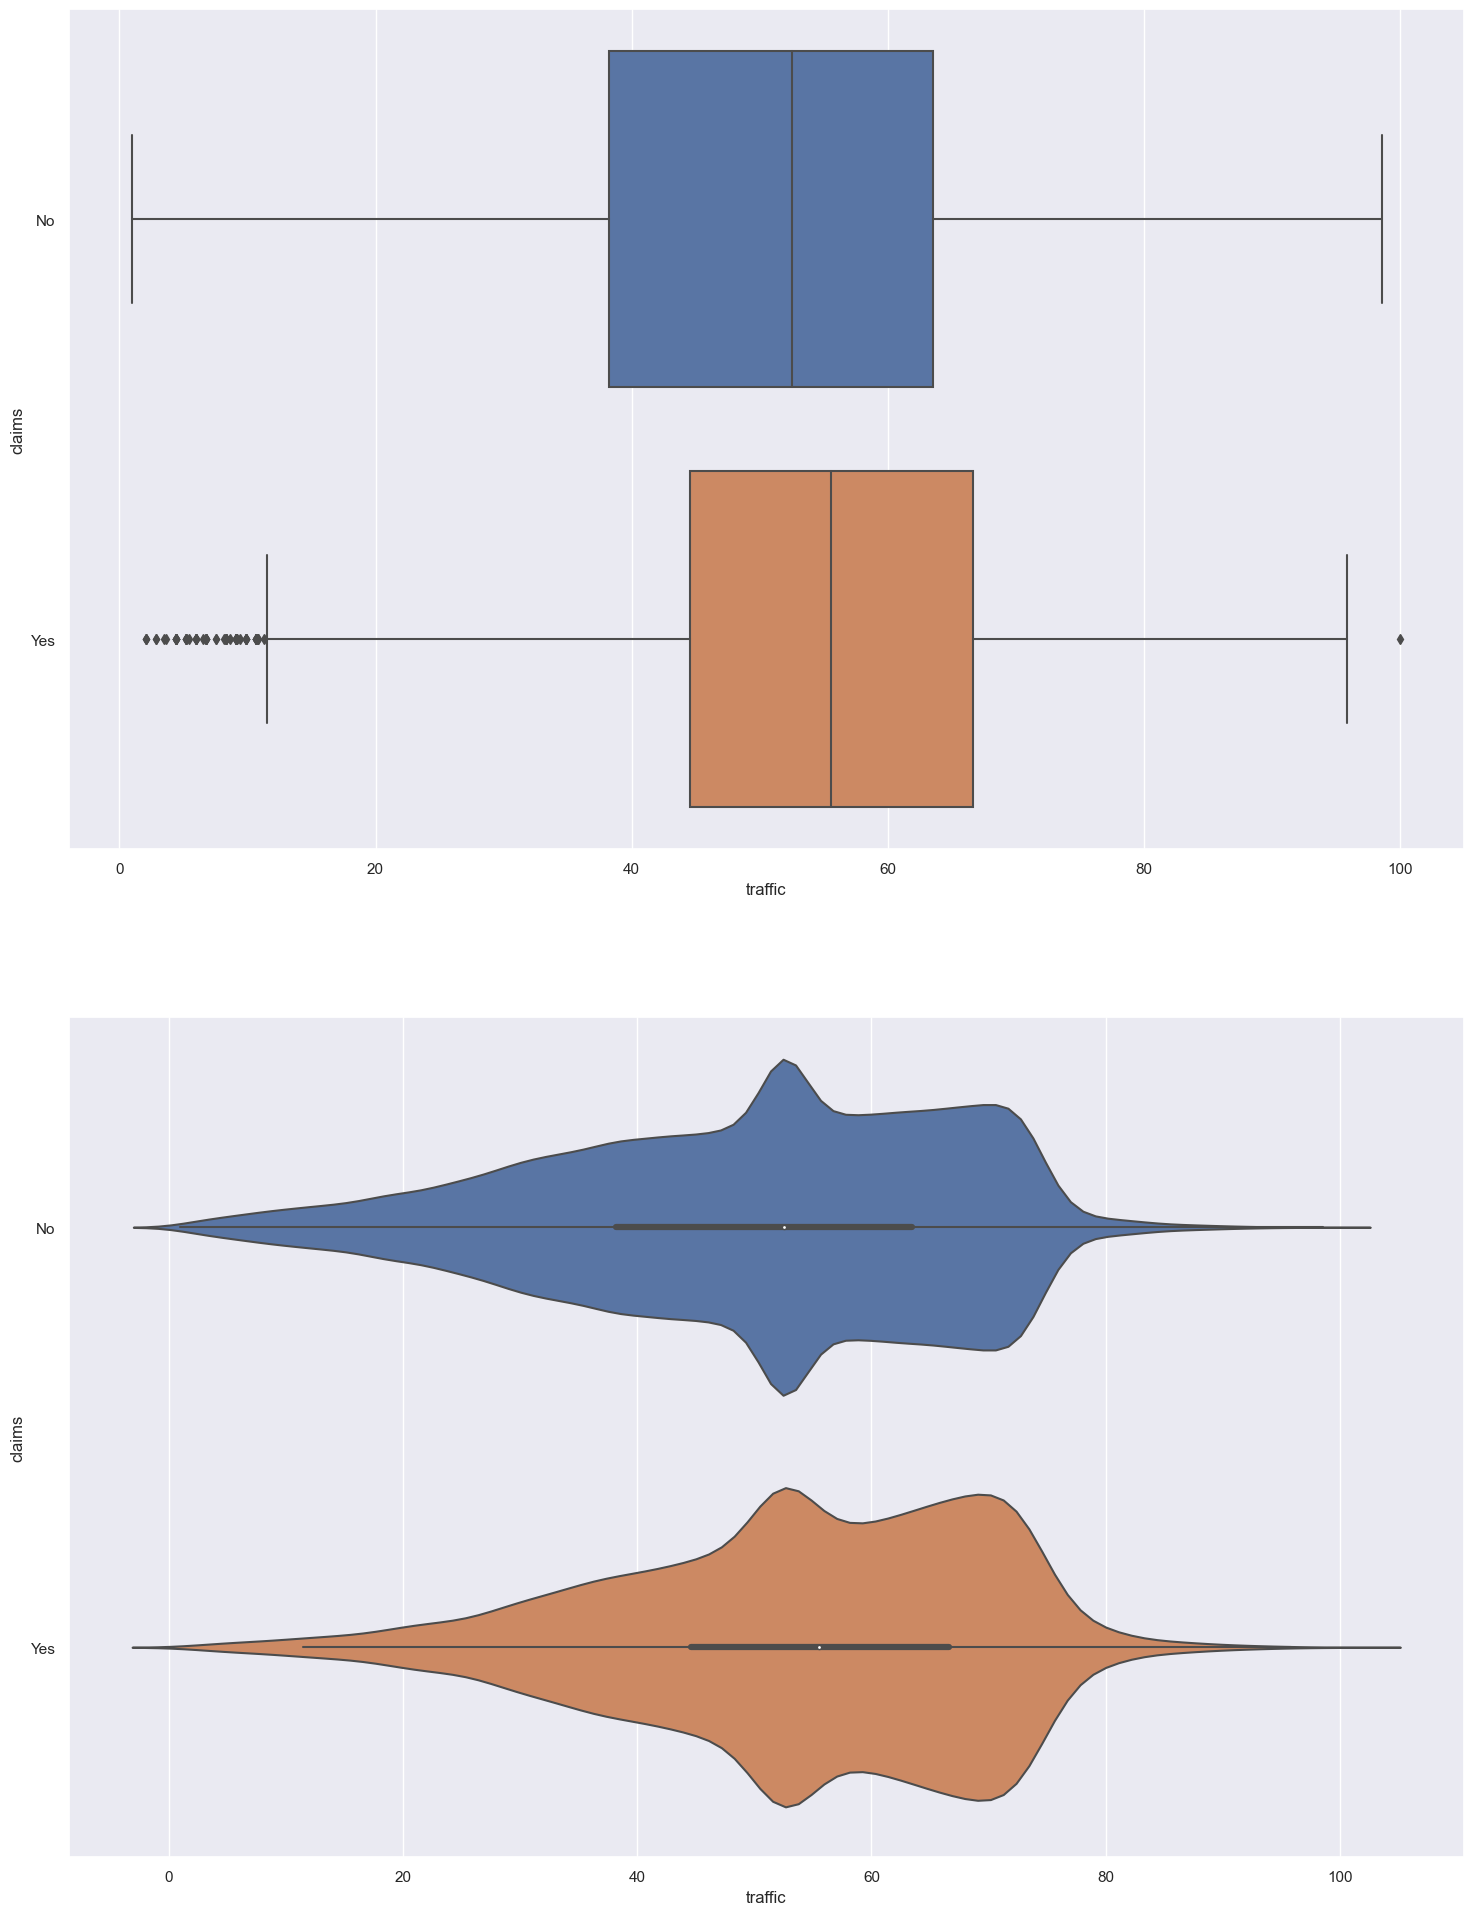

In [11]:
print(data.groupby('claims')['traffic'].describe())

f, axes = plt.subplots(2, 1, figsize=(18, 24))
sb.boxplot(data = data, y='claims', x='traffic', ax = axes[0])
sb.violinplot(data = data, y='claims', x='traffic', ax = axes[1])

# 5. Exploring the relationship between `predictor variables` and `cost` 

## 5.1 Exploring the relationship between `gender` and `cost`
Plot `gender` against `cost` to visualize their mutual relationship.

          count        mean          std  min  25%  50%  75%          max
gender                                                                   
F       31215.0  255.216136  1865.666355  0.0  0.0  0.0  0.0  63226.12169
M       22920.0  674.131644  3004.990955  0.0  0.0  0.0  0.0  69478.89783


<AxesSubplot:xlabel='cost', ylabel='gender'>

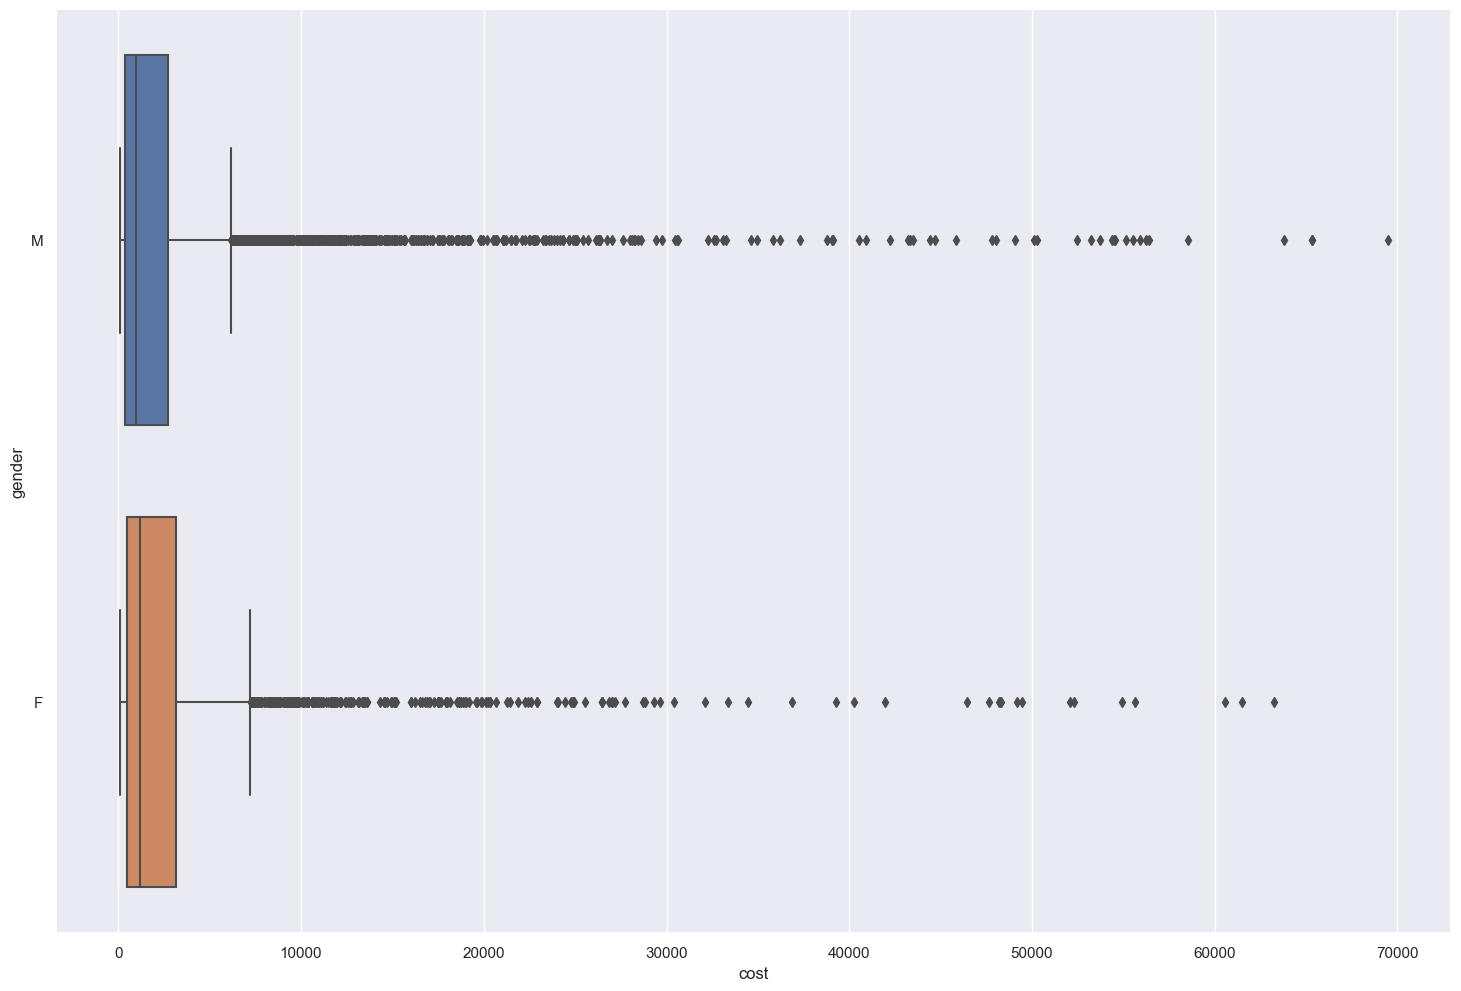

In [12]:
print(data.groupby('gender')['cost'].describe())

f = plt.figure(figsize=(18,12))
sb.boxplot(data=data_with_claims, y='gender', x='cost')

## 5.2 Exploring the relationship between `age` against `cost`
Plot `cost` against `age` to visualize their mutual relationship.

       count         mean          std  min  25%  50%        75%          max
age                                                                          
1.0   3977.0  1397.603823  4442.866337  0.0  0.0  0.0  835.13166  56415.62312
2.0   9138.0   435.072268  1923.556933  0.0  0.0  0.0    0.00000  65306.53615
3.0  15950.0   288.195038  1814.693737  0.0  0.0  0.0    0.00000  60571.21295
4.0  12121.0   208.475476  1365.815658  0.0  0.0  0.0    0.00000  54545.68171
5.0   8080.0   296.321983  2211.967668  0.0  0.0  0.0    0.00000  69478.89783
6.0   4869.0   896.649099  4181.835395  0.0  0.0  0.0    0.00000  63814.54531


<AxesSubplot:xlabel='age', ylabel='cost'>

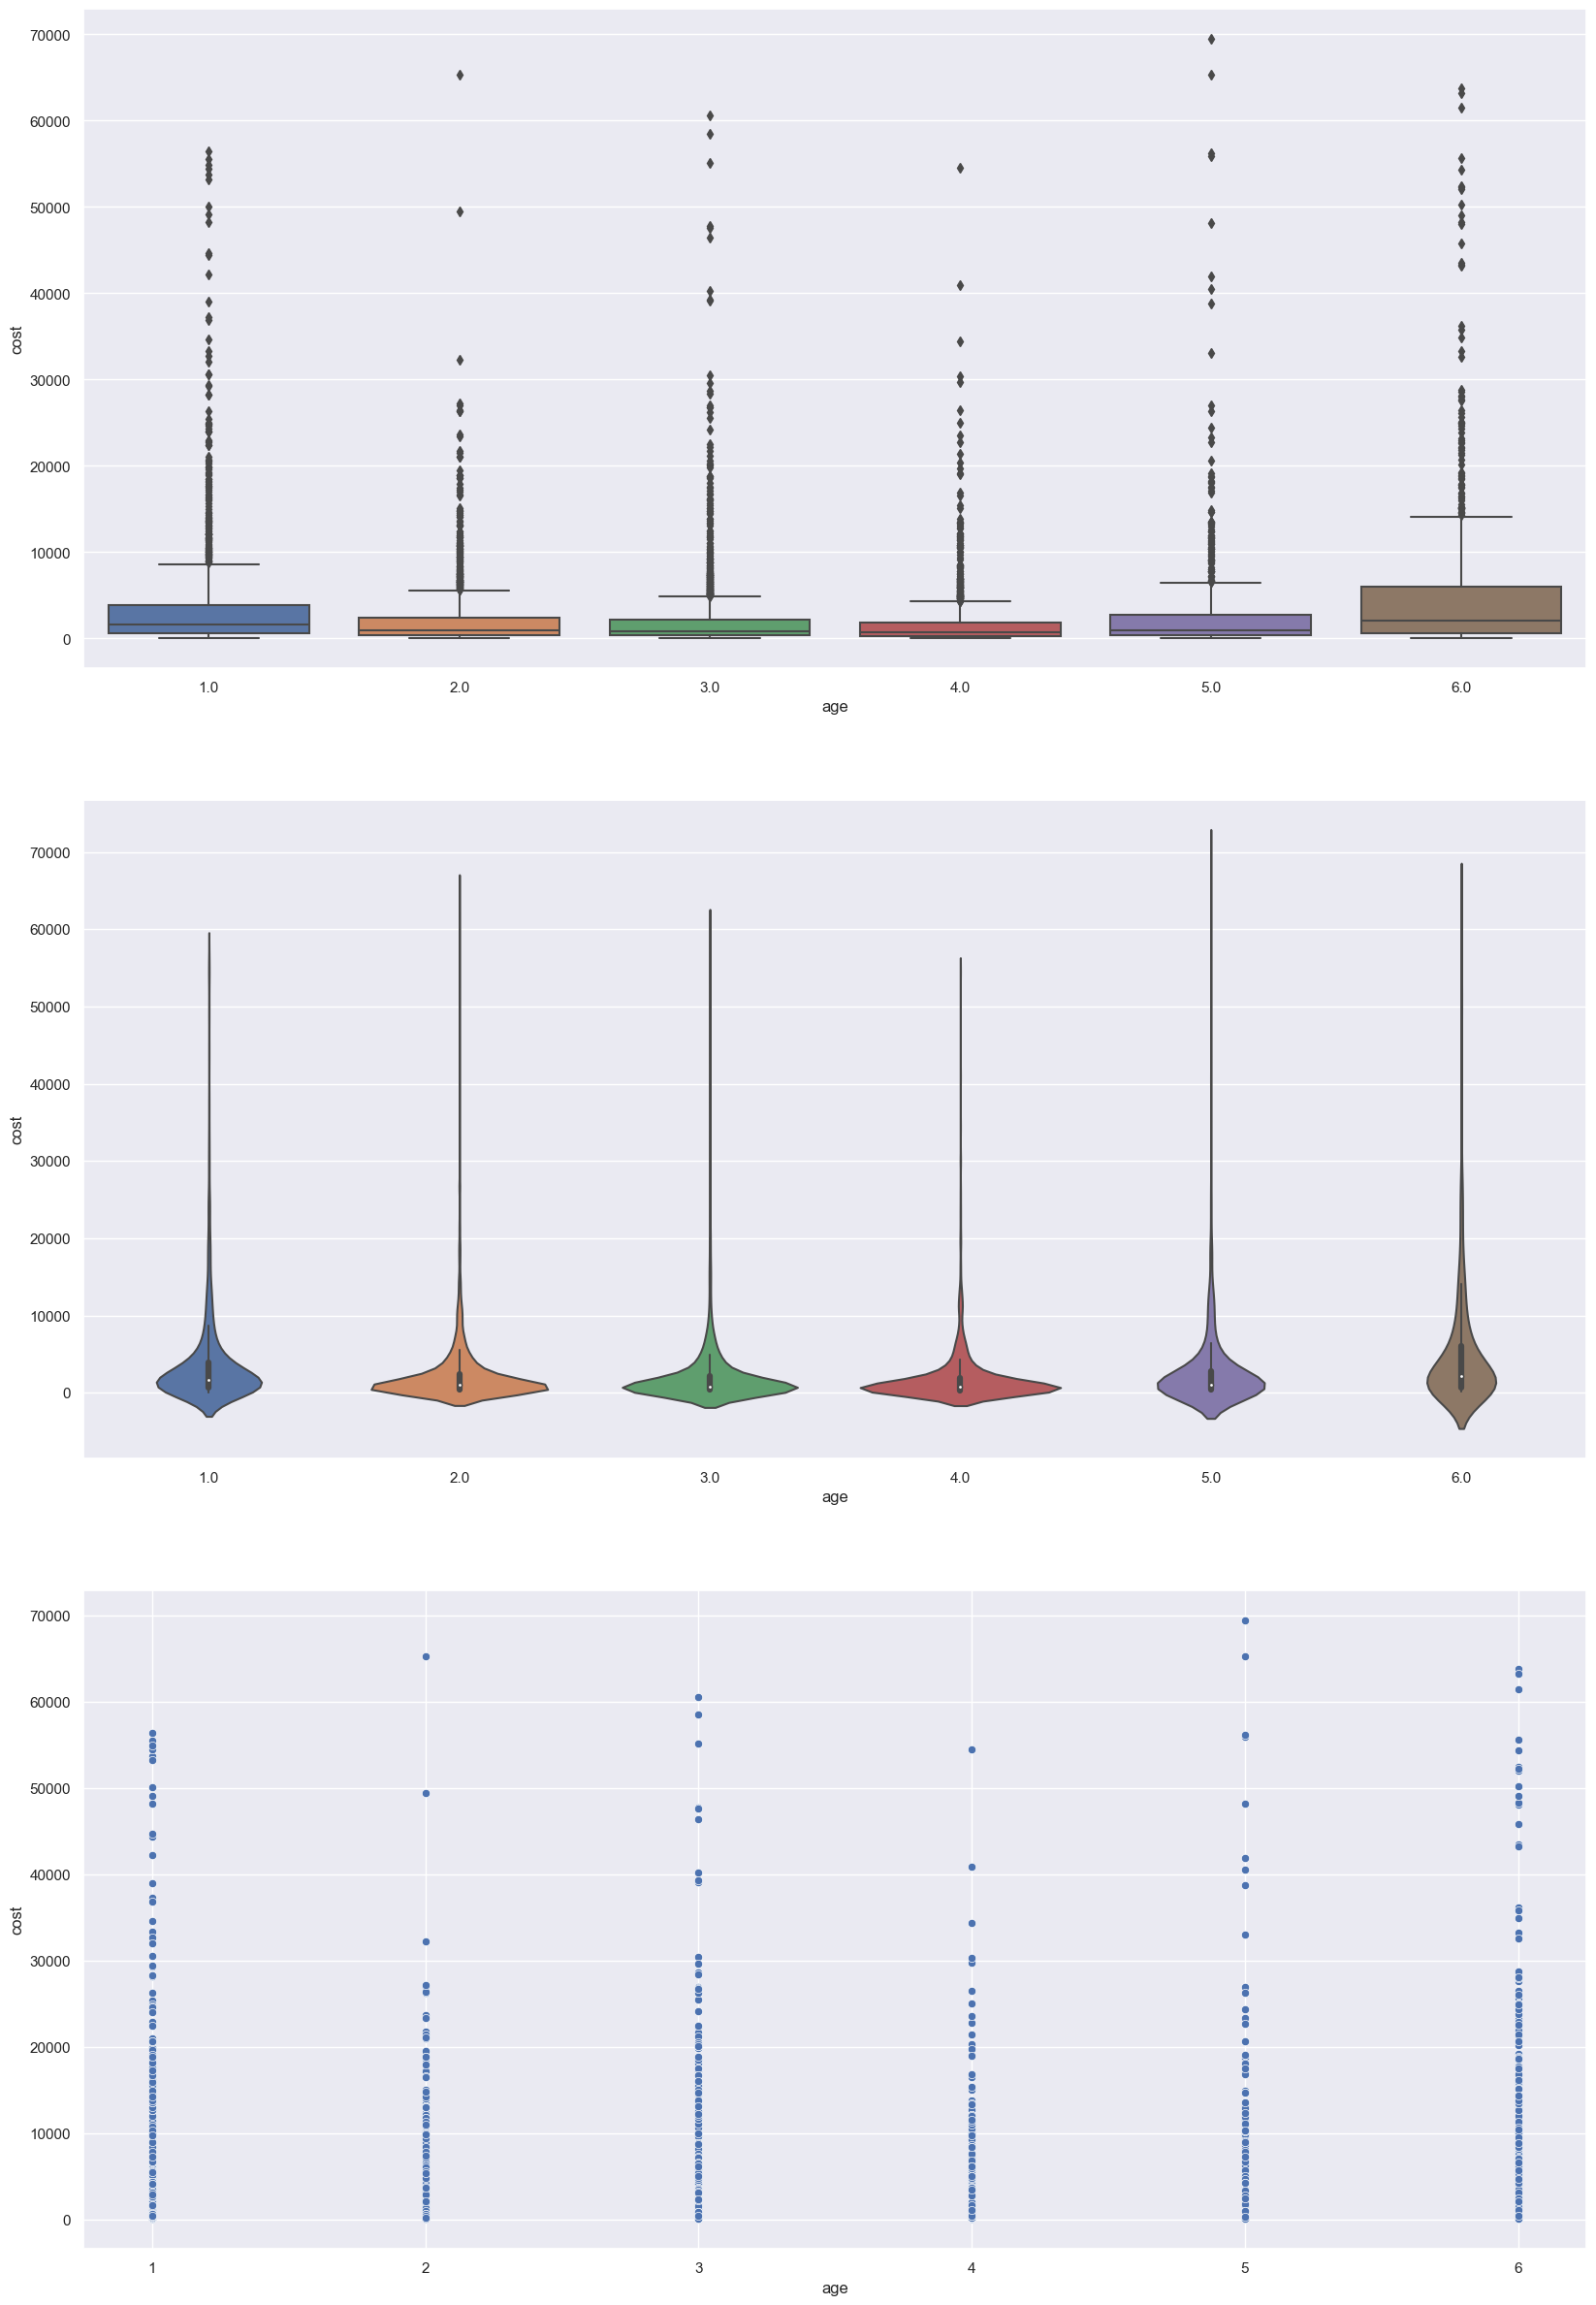

In [13]:
print(data.groupby('age')['cost'].describe())

f, axes = plt.subplots(3,1, figsize=(20,30))
sb.boxplot(data = data_with_claims, x='age', y='cost', ax=axes[0])
sb.violinplot(data = data_with_claims, x='age', y='cost', ax=axes[1])
sb.scatterplot(data = data_with_claims, x="age", y="cost", ax=axes[2])

## 5.3 Exploring the relationship between traffic and cost
Plot `cost` against `traffic` to visualize their mutual relationship.

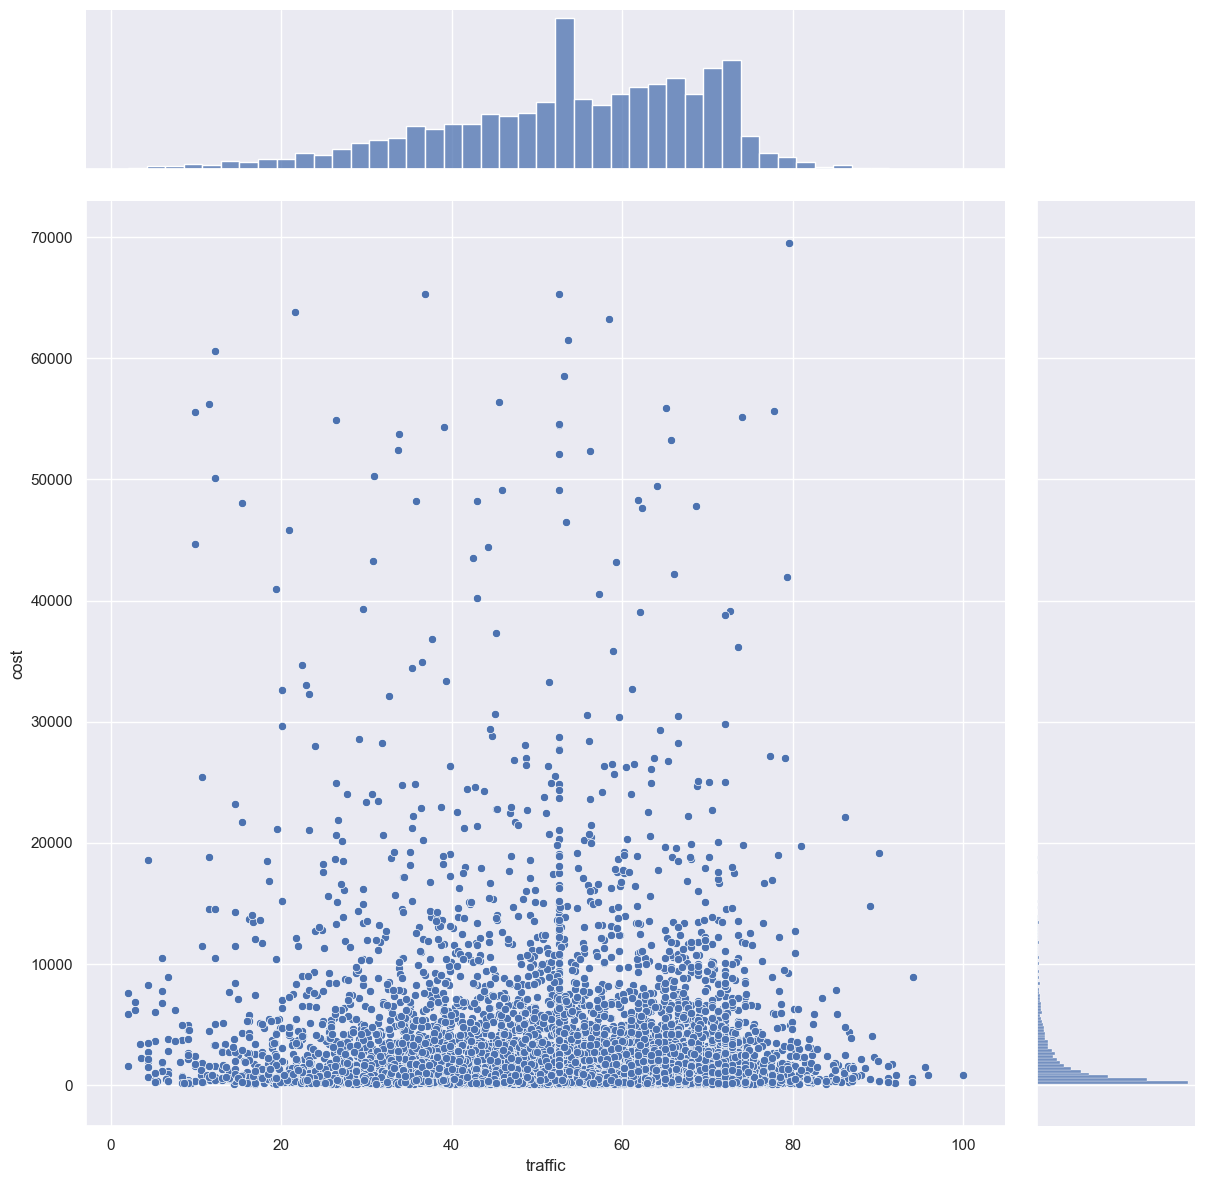

In [14]:
sb.jointplot(x = "traffic", y = "cost", data = data_with_claims, height = 12)

## 6. Exploring the relationship between `numclaims` and `cost`
Plot `cost` against `numclaims` to visualize their mutual relationship.

             count          mean           std         min          25%  \
numclaims                                                                 
0          45963.0      0.000000      0.000000    0.000000     0.000000   
1           6549.0   2305.895797   4603.551200   80.363865   350.027691   
2           1102.0   4299.865683   7086.141111  104.133026   718.898696   
3            370.0   6195.034781   9900.217781  113.685522  1187.133554   
4            110.0   7296.328355   9384.716400  270.487123  1625.235986   
5             41.0  11784.059729  13496.289242  568.069657  2185.577617   

                   50%           75%          max  
numclaims                                          
0             0.000000      0.000000      0.00000  
1           855.647511   2306.554267  65306.53615  
2          1910.710783   4679.039818  69478.89783  
3          2610.077519   6086.842166  65309.89674  
4          3604.765971   7574.034736  53247.72824  
5          6166.561537  15379.34871

<AxesSubplot:xlabel='numclaims', ylabel='cost'>

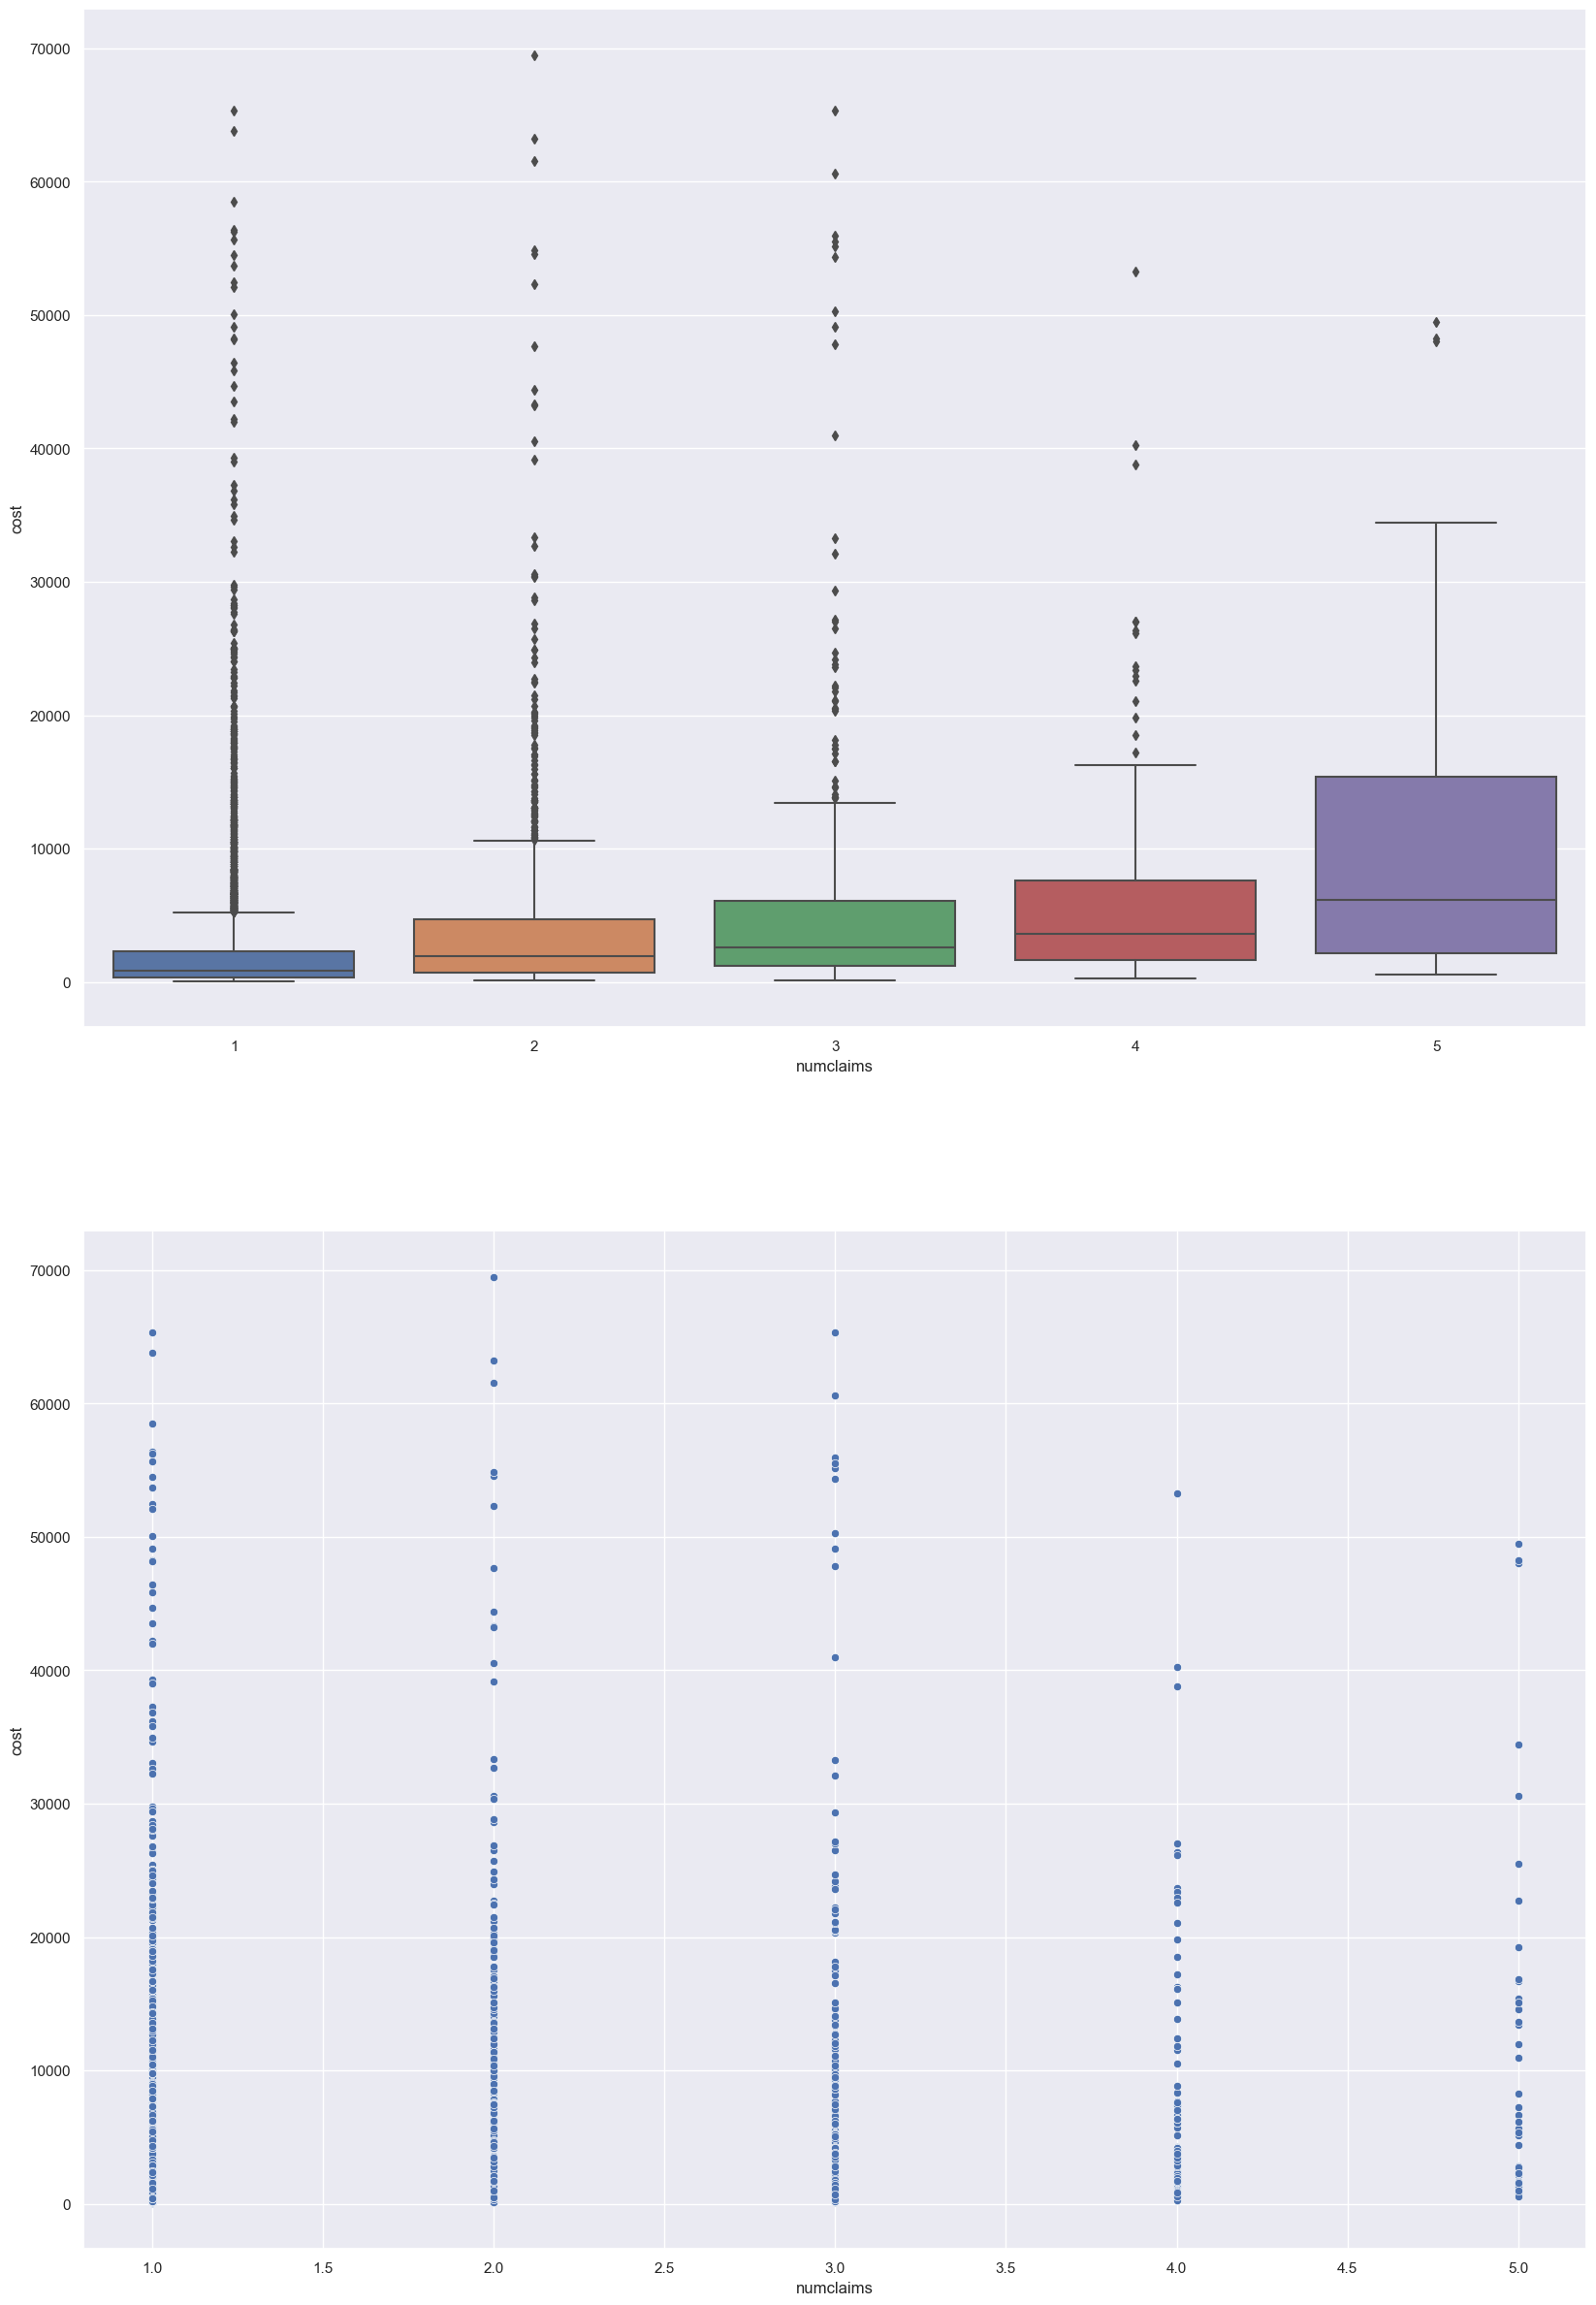

In [15]:
print(data.groupby('numclaims')['cost'].describe())

f, axes = plt.subplots(2,1,figsize=(20,30))
sb.scatterplot(x = "numclaims", y = "cost", data = data_with_claims, ax=axes[1])
sb.boxplot(x = "numclaims", y = "cost", data = data_with_claims, ax=axes[0])